In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from scipy.optimize import curve_fit

Lo scopo di questa esercitazione è stato quello di stimare la posizione media dell'elettrone in un atomo di idrogeno (non relativistico) quando esso si trova nel ground state e nello stato eccitato 2p, nello specifico si è andati a dare una stima della posizione radiale media dell'elettrone nelle due configurazioni. A partire dall'espressione della funzione d'onda elettronica si è implementato il metodo di campionamento di Metropolis per creare un sample di posizoni (x,y,z) in base alle quali sono state stimate le quantità $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ e $\left\langle r \right\rangle_{\Psi_{2,1,0}}$, i valori ottenuti sono stati confrontati con i valori teorici che prevedono:
$$
\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0
\quad
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0
$$

L'algoritmo di Metropolis (sia per il ground state che per lo stato 2p) è stato costruito scegliendo come probabilità di transizione $T(\vec{x}|\vec{y})$ una distribuzione uniforme centrata nello stato $\vec{y}$ del sistema la cui ampiezza è stata scelta in modo tale che il rate di accettazione degli stati proposti $\vec{x}$ fosse pari a circa il $50\%$. In oltre, per equilibrare il sistema, le misure di posizione radiale dell'elettrone sono state acquisite a seguito di un tempo di equilibrazione pari a $100$ passi montecarlo. In tutto sono state acquisite  $10^4$ misure e suddivise in $100$ per calcolarne l'incertezza statistica. Per entrambi gli stati del sistema si è scelto di partire dalla posizione $(1,1,1)$. Di seguito mostriamo i grafici delle stime delle posizioni radiali nelle due configurazioni atomiche in funzione del numer di blocchi.

In [2]:
db_rgs=pd.read_csv('R_gs', sep=' ', header=None)
db_r2p=pd.read_csv('R_2p', sep=' ', header=None)
db_r = pd.DataFrame(columns=['R gs', 'uncert gs', 'R 2p', 'uncert 2p'])

In [3]:
db_r['R gs']=list(db_rgs.iloc[:,0])
db_r['uncert gs']=list(db_rgs.iloc[:,1])
db_r['R 2p']=list(db_r2p.iloc[:,0])
db_r['uncert 2p']=list(db_r2p.iloc[:,1])

In [4]:
Nblocchi=100
blocchi=[]

In [5]:
for i in range(0, Nblocchi):
    blocchi.append(i)

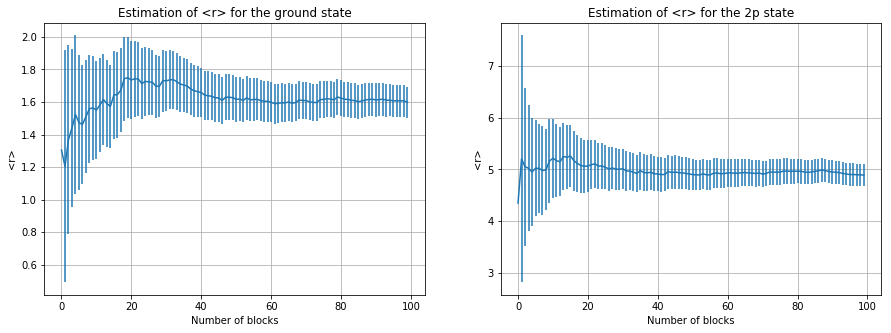

In [6]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)

plt.errorbar(blocchi, db_r.iloc[:,0], yerr=db_r.iloc[:,1] )
plt.xlabel('Number of blocks')
plt.ylabel('<r>')
plt.title('Estimation of <r> for the ground state')
plt.grid(True)
plt.subplot(1, 2, 2)
plt.errorbar(blocchi, db_r.iloc[:,2], yerr=db_r.iloc[:,3] )
plt.xlabel('Number of blocks')
plt.ylabel('<r>')
plt.title('Estimation of <r> for the 2p state')
plt.grid(True)